# Stock Market Analysis and Prediction Using LSTM



_Time Series data is a series of data points indexed in time order._

Time series data is everywhere, therefore manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use **yfinance** to get stock information, and **visualize** different aspects of it using Seaborn and Matplotlib. 

We will also look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method.

Thus, along the way we will be going over the following points, through Data Visualization and towards the end, using a state of the art Recursive Neural Network, LSTM. : -

    1.) Visualising the change in stock price overtime.
    2.) Daily return of the stock on average.
    3.) Moving average of the various stocks and what it means.
    4.) Correlation between different stocks.
    5.) How much value do we put at risk by investing in a particular stock?
    6.) Predicting future stock behavior using LSTM.

***   

## Getting our Data

The first step for all Data driven projects is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using **yfinance** library which offers a threaded and Pythonic way to download market data from Yahoo.

# 1. Visualising the change in stock price overtime.

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
# pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [3]:
# !pip install -q yfinance

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-22,135.080002,135.649994,133.729996,134.250000,134.250000,32935100,AMAZON
2023-08-23,134.500000,135.949997,133.220001,135.520004,135.520004,42801000,AMAZON
2023-08-24,136.399994,136.779999,131.830002,131.839996,131.839996,43646300,AMAZON
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44147500,AMAZON
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400,AMAZON
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100,AMAZON
2023-08-30,134.929993,135.679993,133.919998,135.070007,135.070007,36137000,AMAZON
2023-08-31,135.059998,138.789993,135.000000,138.009995,138.009995,58781300,AMAZON
2023-09-01,139.460007,139.960007,136.880005,138.119995,138.119995,40948300,AMAZON


In [106]:
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'white'})
plt.rcParams['axes.grid'] = True


In [60]:
company_name

['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

In [40]:
df.shape

(1004, 7)

In [45]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2938 entries, 2012-01-03 to 2023-09-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2938 non-null   float64
 1   High       2938 non-null   float64
 2   Low        2938 non-null   float64
 3   Close      2938 non-null   float64
 4   Adj Close  2938 non-null   float64
 5   Volume     2938 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 160.7 KB


In [61]:
count=[0] * 4

for i in range(len(df)):
    if df['company_name'][i] in company_name :
        t=company_name.index(df['company_name'][i])
        count[t]+=1


In [62]:
count

[251, 251, 251, 251]

Hence, we have 251 stock data for each company.

In [49]:
df.company_name[0]

'APPLE'

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2938 entries, 2012-01-03 to 2023-09-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2938 non-null   float64
 1   High       2938 non-null   float64
 2   Low        2938 non-null   float64
 3   Close      2938 non-null   float64
 4   Adj Close  2938 non-null   float64
 5   Volume     2938 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 160.7 KB


----------------------------------------------------------------------------------------------------------------------------
**Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data.**

**Notice also that weekends are missing from the records.**

**Now that we have our data, let's perform some basic data analysis and check our data.**

----------------------------------------------------------------------------------------------------------------------------

## Performing Descriptive Statistics about the Data


Now, we use `.describe()` which generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values,e.t.c.

It analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. 

The output will vary depending on what is provided. Below, we will get a DataFrame of Apple  stock closing price, adjusted closing price, the High, e.t.c. .

In [2]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,160.143387,161.930916,158.582669,160.345418,159.867417,6.942154e+07
std,18.846037,18.606840,19.133177,18.865916,19.041216,2.395131e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.274216,5.127550e+07
50%,154.789993,157.089996,153.369995,155.000000,154.394058,6.472720e+07
75%,177.135002,178.579994,176.129997,176.900002,176.790489,8.109905e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [4]:
AAPL.shape

(251, 7)

Here, we can see we have ~250 records and 7 columns for each record, the first is reserved for the various descriptive statistics and the rest will be the stock price values which we will be using throughout our analysis, in particular we will be looking at adjusted closed value as this is the adjusted closed value(the closed value being the last stock sold on a regular trading day) , thus used by stock traders to estimate/ predict.



-----------------
## Information About our Data

`.info()` method prints information about a DataFrame including the index, the datatype of columns, name of the columns, number of non-null values, and memory usage.

In [5]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-09-06 to 2023-09-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


-----------------------
## Closing Price

_"The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time."_

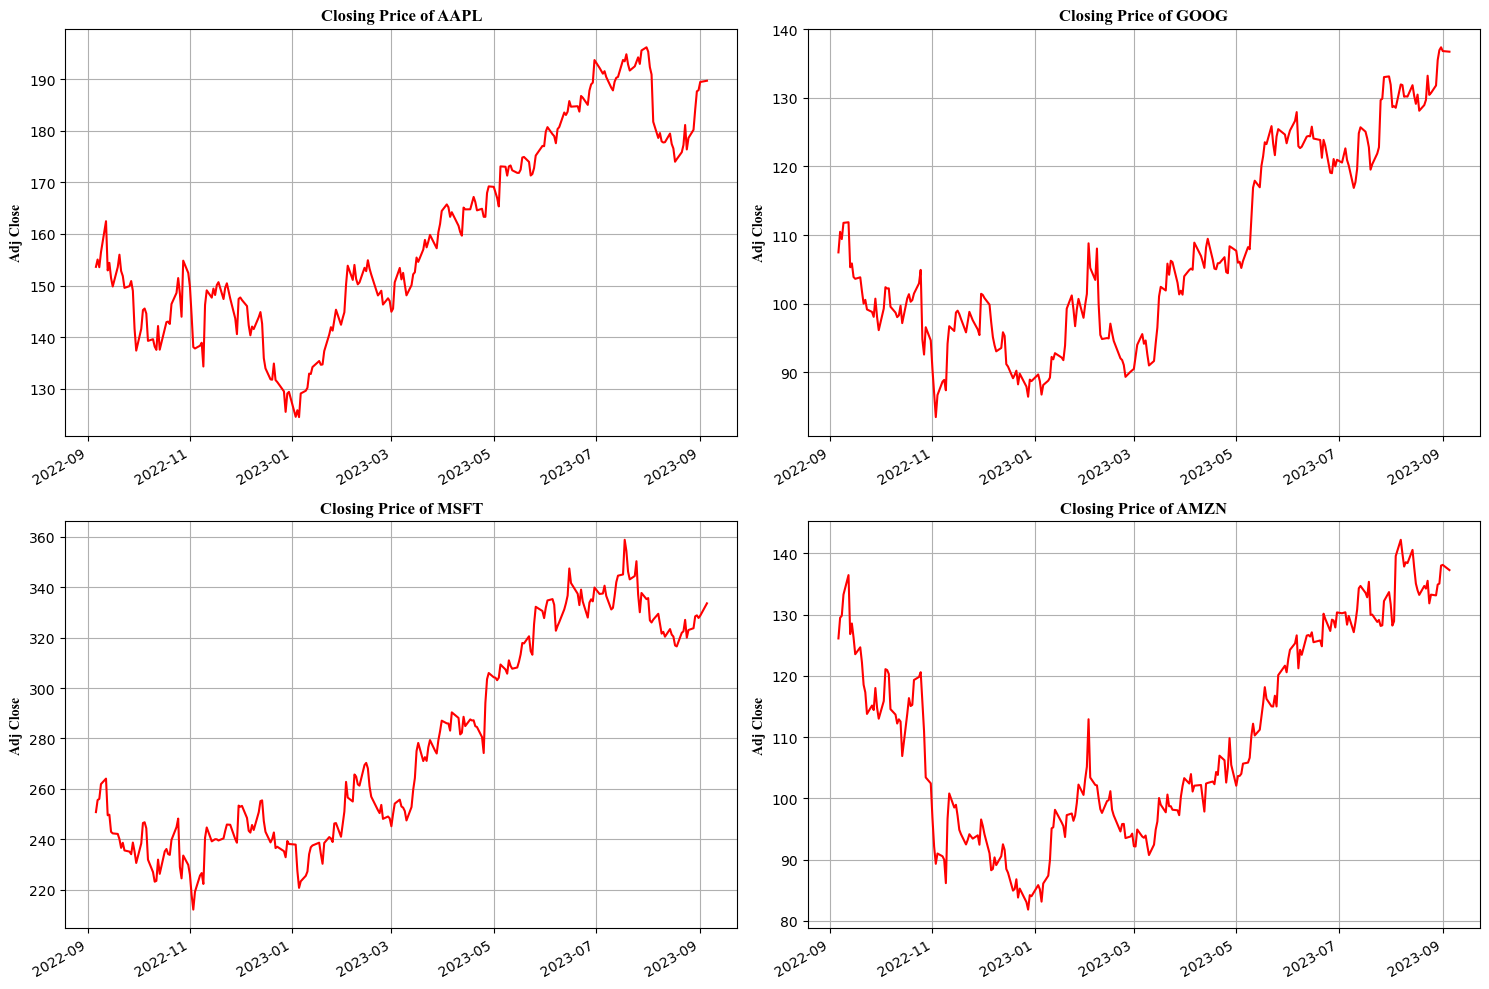

In [107]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
csfont = {'fontname':'Times New Roman'}


for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='red')
    plt.ylabel('Adj Close',weight='bold',**csfont)
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}",weight='bold',**csfont)
#     ax = plt.gca()
#     ax.set_facecolor("white")
    


    
plt.tight_layout()

## Volume of Sales


_"Volume is the **amount** of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders."_

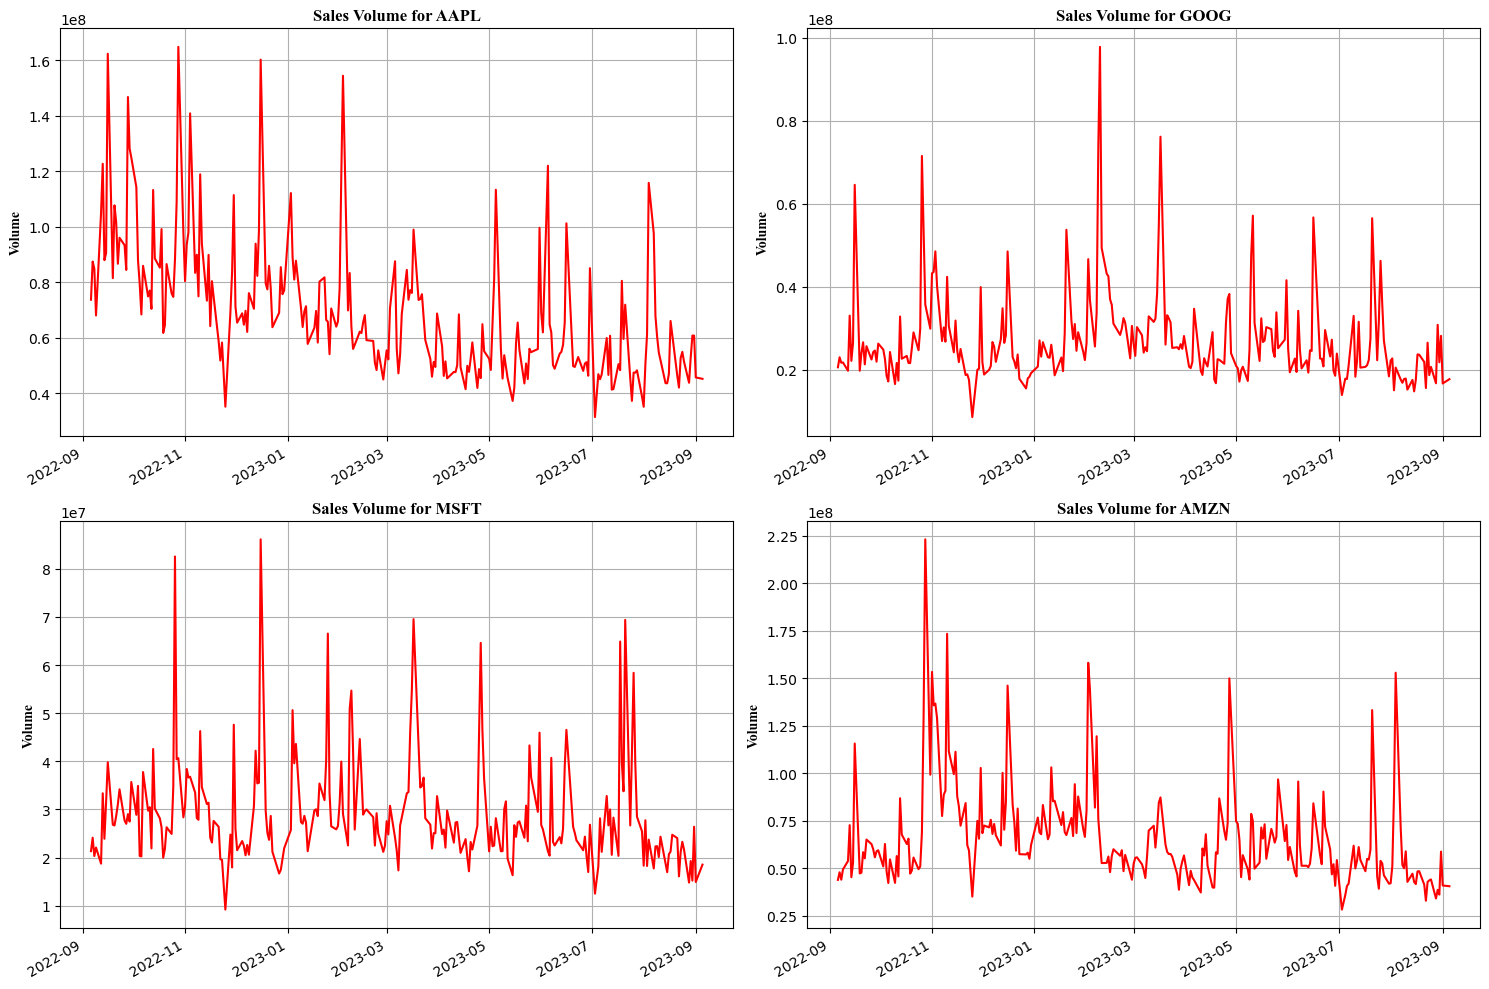

In [108]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
csfont = {'fontname':'Times New Roman'}


for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='red')
    plt.ylabel('Volume',weight='bold',**csfont)
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}",weight='bold',**csfont)

#     ax = plt.gca()
#     ax.set_facecolor("white")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. Daily return of the stock on average.

_"The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses."_

In [109]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-06,156.470001,157.089996,153.690002,154.529999,153.618668,73714800,APPLE
2022-09-07,154.820007,156.669998,153.610001,155.960007,155.040253,87449600,APPLE
2022-09-08,154.639999,156.360001,152.679993,154.460007,153.549088,84923800,APPLE
2022-09-09,155.470001,157.820007,154.750000,157.369995,156.441925,68028800,APPLE
2022-09-12,159.589996,164.259995,159.300003,163.429993,162.466187,104956000,APPLE
...,...,...,...,...,...,...,...
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100,AMAZON
2023-08-30,134.929993,135.679993,133.919998,135.070007,135.070007,36137000,AMAZON
2023-08-31,135.059998,138.789993,135.000000,138.009995,138.009995,58781300,AMAZON


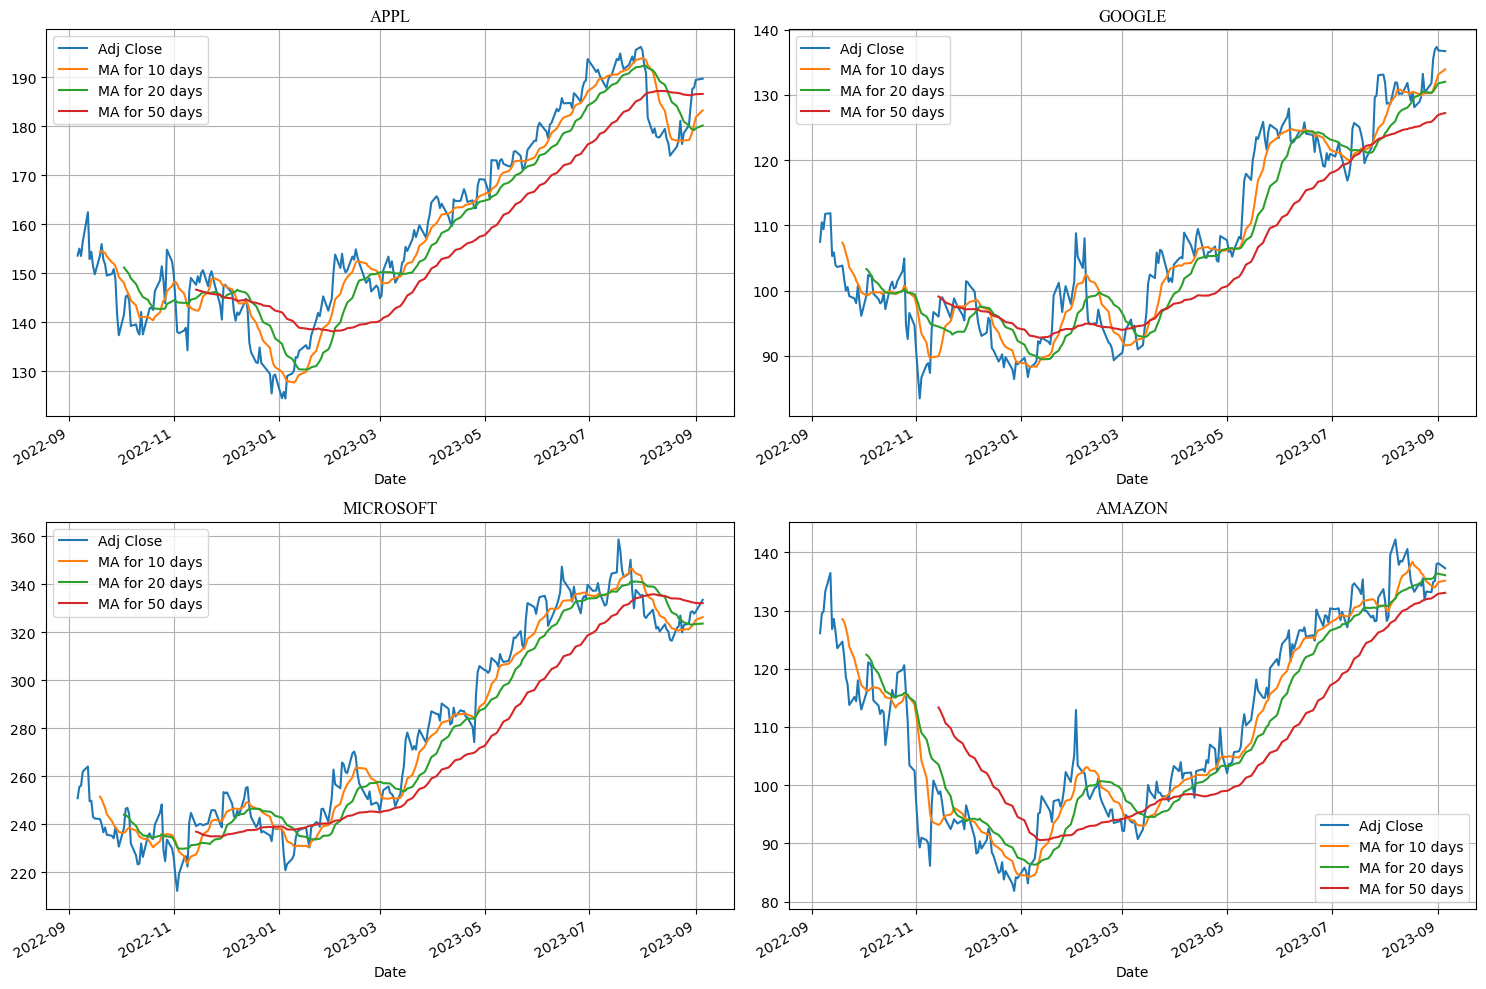

In [110]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
csfont = {'fontname':'Times New Roman'}
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)


# for i in range(2):
#     for j in range(2):
#         AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i,j])
# #         axes[i,j].set_title('APPLE')
#         axes[i,j].set_title(company_name[i+j])

#         ax = plt.gca()
#         ax.set_facecolor("white")

        
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
#         axes[i,j].set_title('APPLE')
axes[0,0].set_title('APPL',**csfont)

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE',**csfont)



MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT',**csfont)



AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON',**csfont)





fig.tight_layout()

-----------------
**We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.**

--------------------

# 3. Daily return of the stock on average.

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

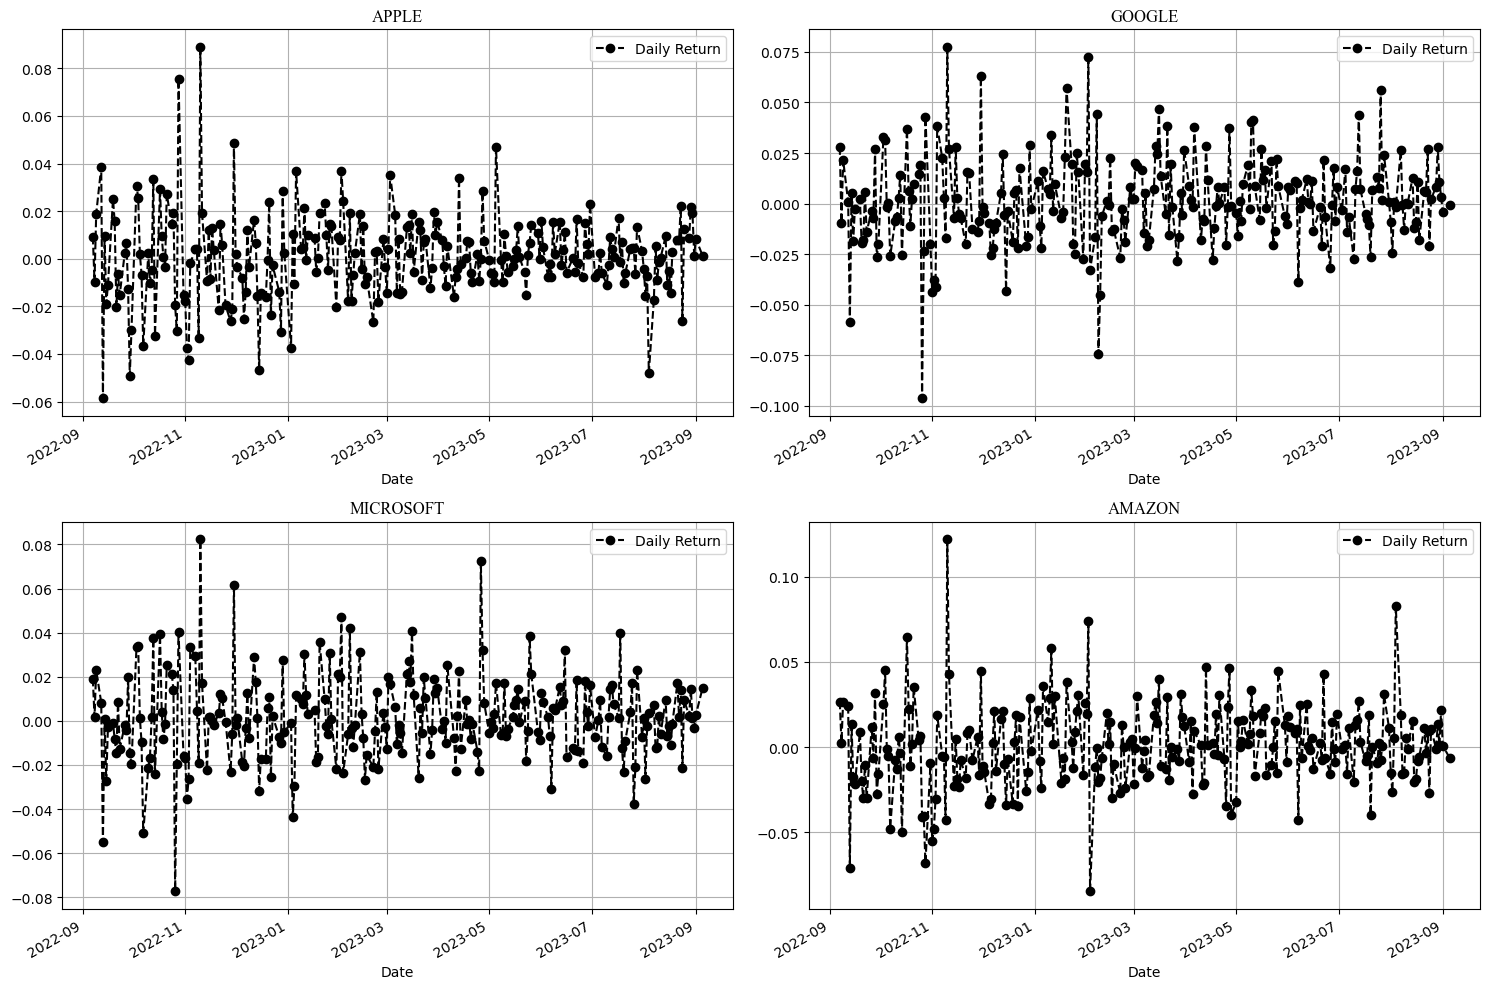

In [115]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# ax = plt.axes()
# ax.set_facecolor("white")



AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',color='black')
axes[0,0].set_title('APPLE',**csfont)


GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o',color='black')
axes[0,1].set_title('GOOGLE',**csfont)


MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',color='black')
axes[1,0].set_title('MICROSOFT',**csfont)


AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o',color='black')
axes[1,1].set_title('AMAZON',**csfont)



fig.tight_layout()


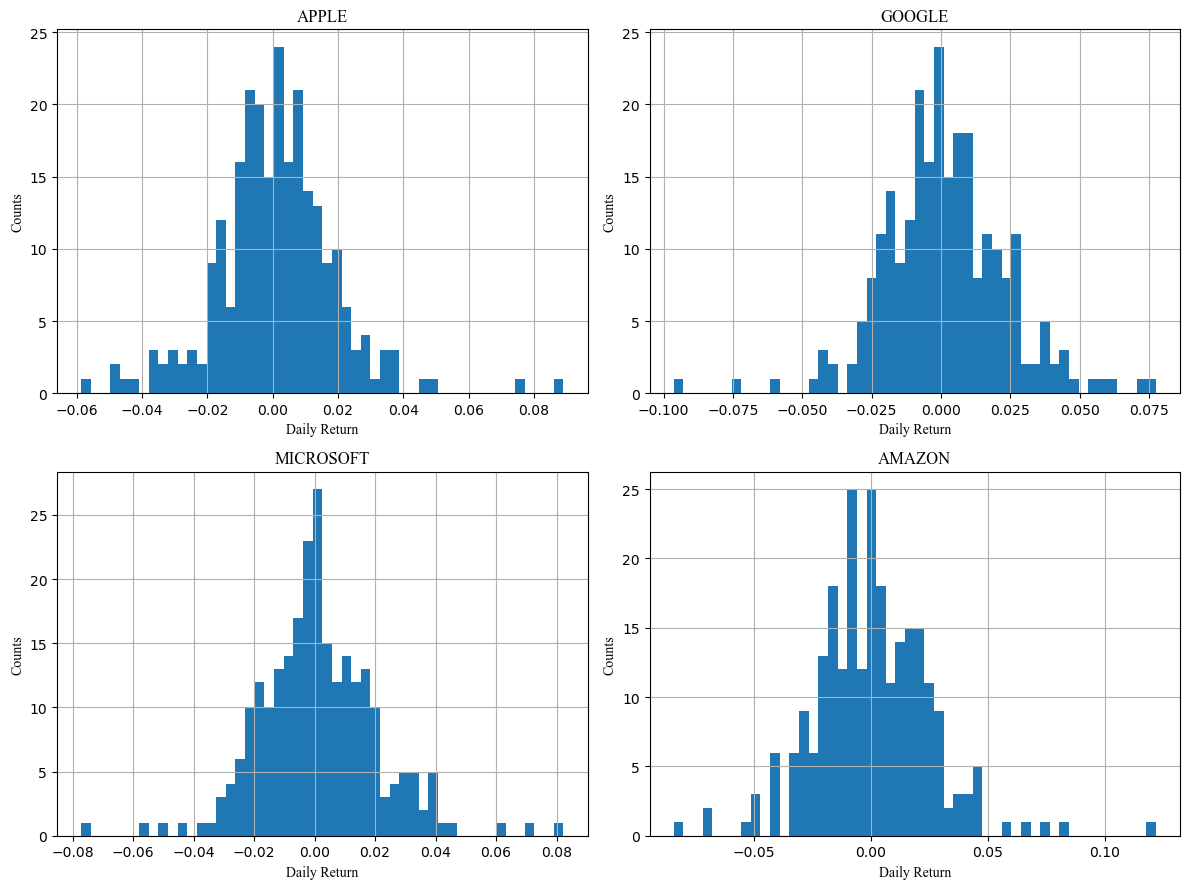

In [112]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return',**csfont)
    plt.ylabel('Counts',**csfont)
    plt.title(f'{company_name[i - 1]}',**csfont)
    
plt.tight_layout()

# 4. Correlation between different stocks closing prices.

_"Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor."_

Now what if we wanted to analyze the returns of all the stocks in our list? We will build a DataFrame with all the ['Close'] columns for each of the stocks dataframes to see.

In [113]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-09-06,NaN,NaN,NaN,NaN
2022-09-07,0.009254,0.026723,0.027912,0.019112
2022-09-08,-0.009618,0.002626,-0.009595,0.001666
2022-09-09,0.018840,0.026575,0.021568,0.022977
2022-09-12,0.038508,0.023861,0.000805,0.008281


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

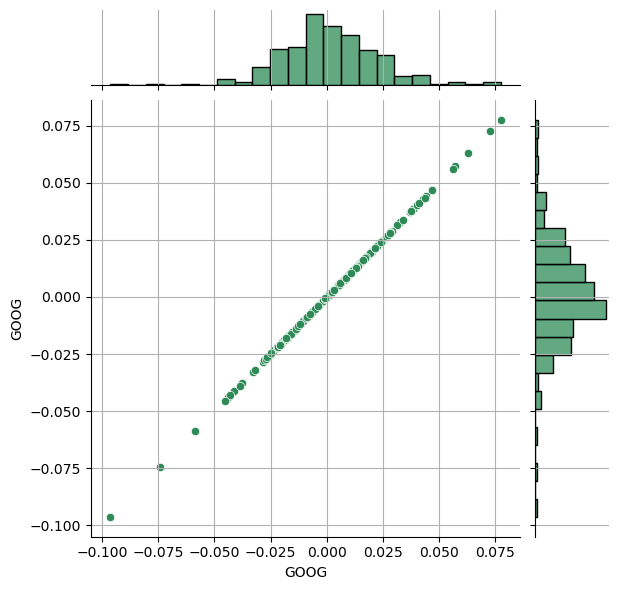

In [116]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


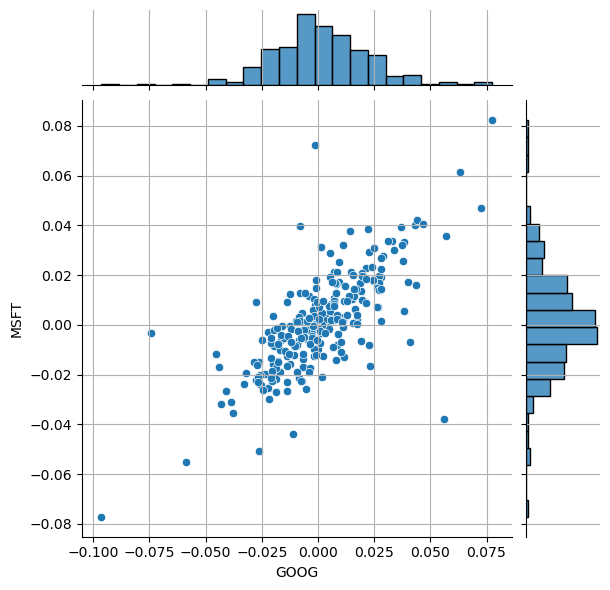

In [117]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

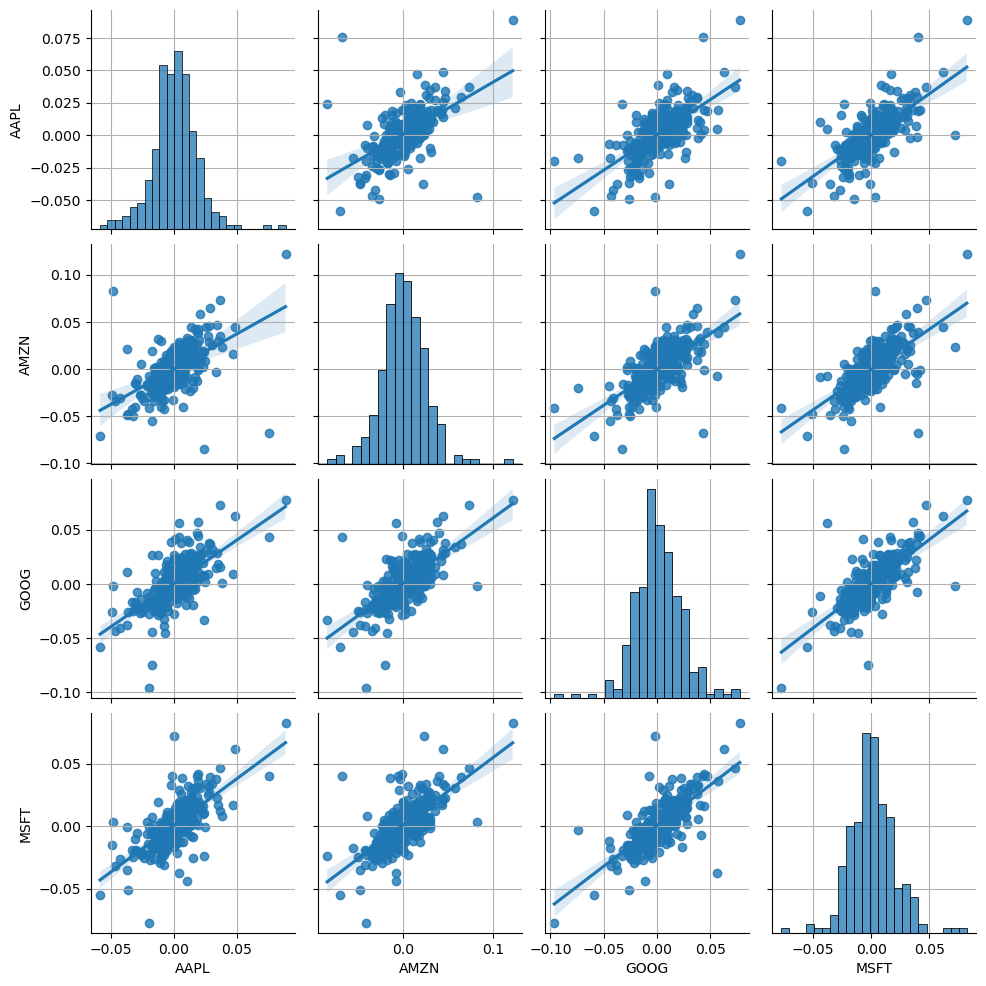

In [118]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

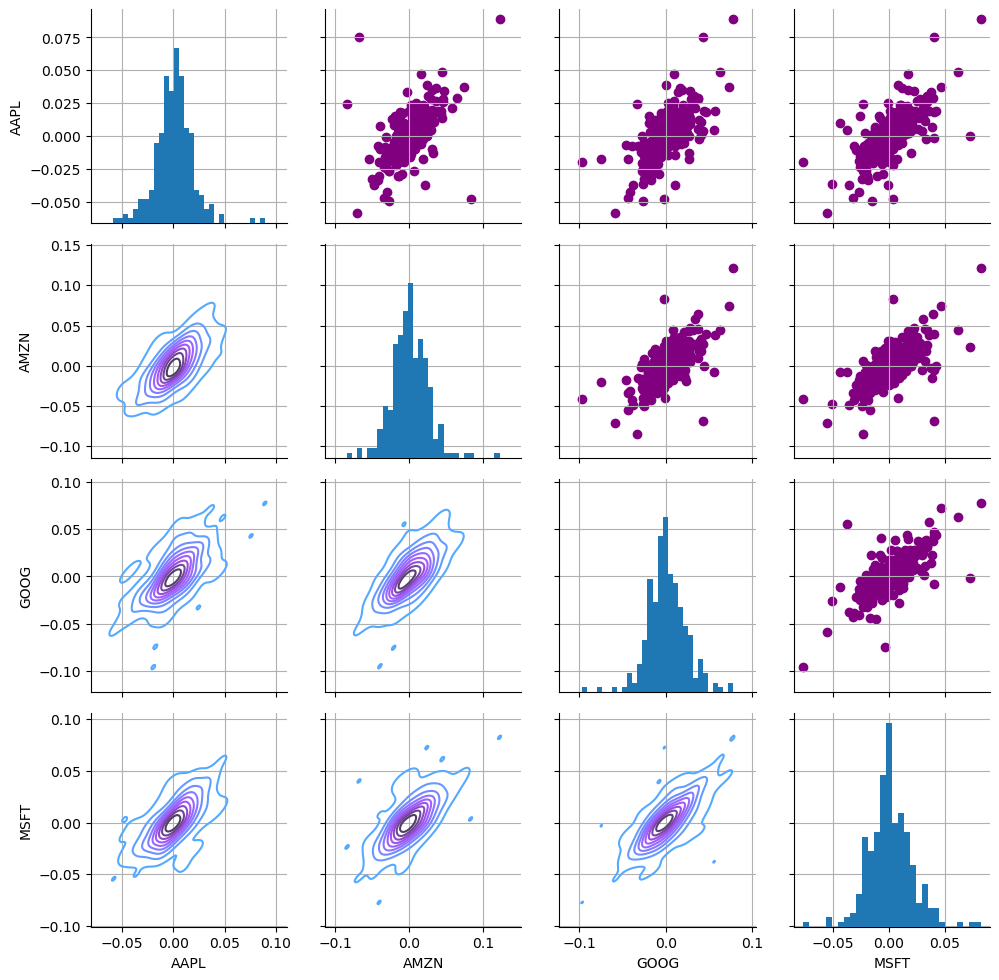

In [119]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

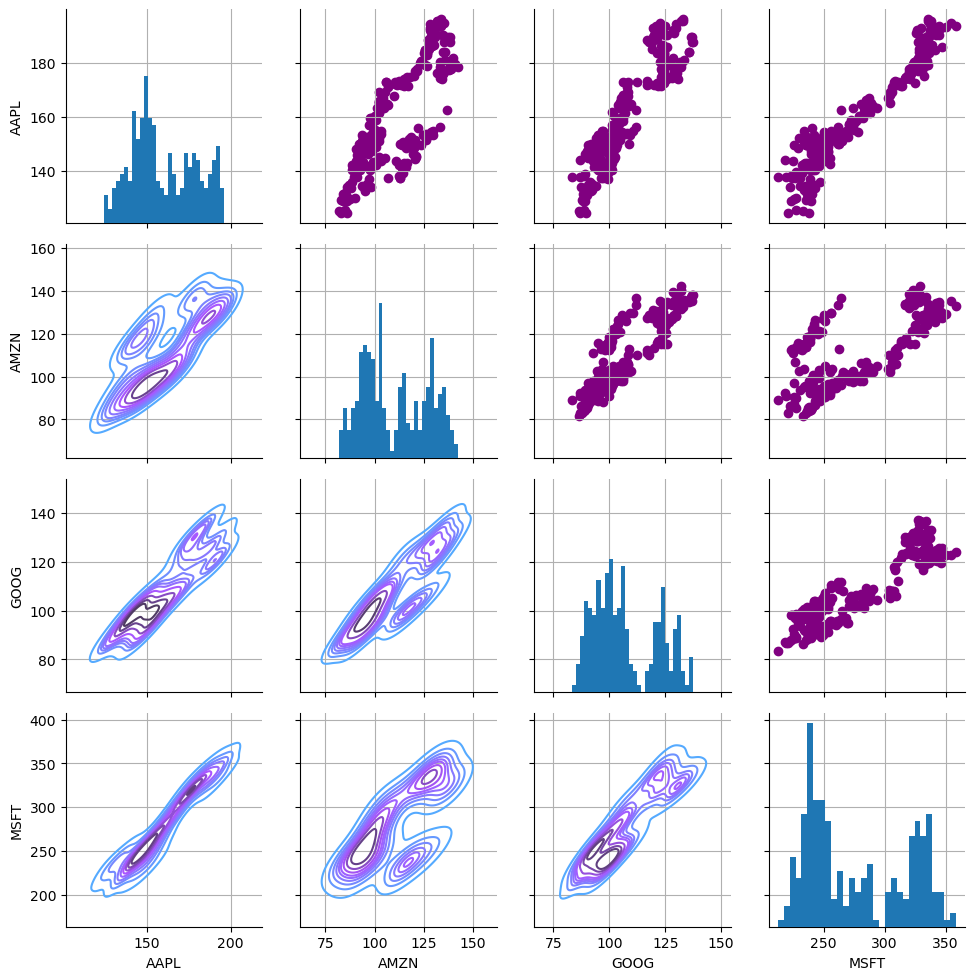

In [120]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

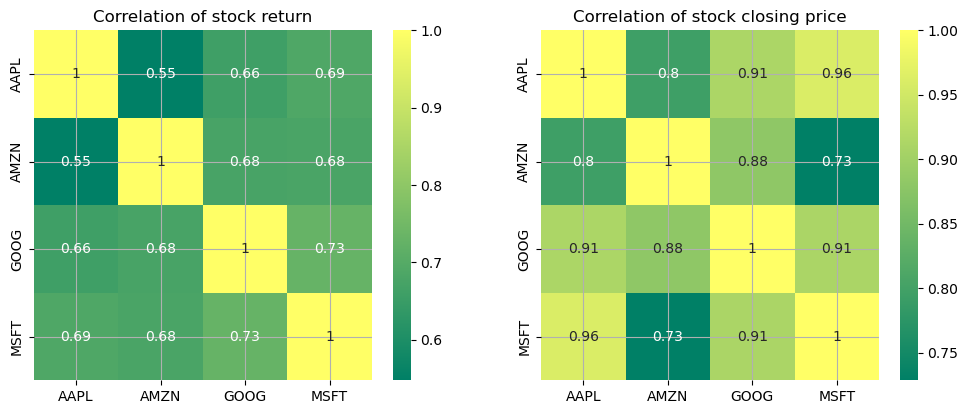

In [121]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

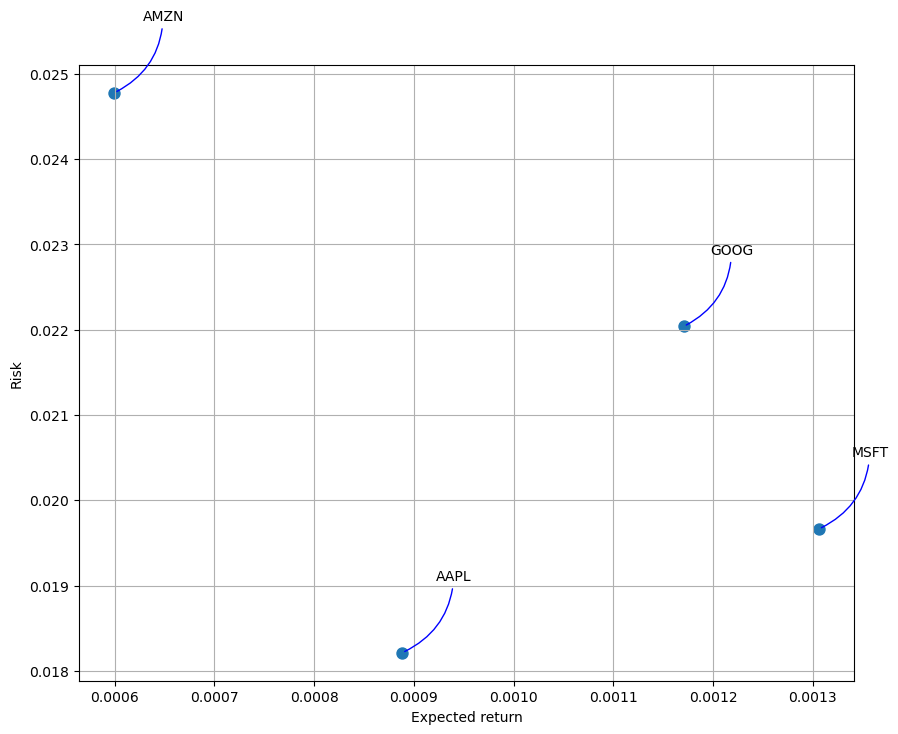

In [122]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Given we can see Apple has the least risk and a good amount of expected return, let us say I want to buy APPLE stocks, now what if I want to predict the closing price of the stock I will be purchasing? 

We will explore this in the next section.

# 6. Predicting the closing price stock price of APPLE inc:

In [123]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466091,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533088,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804702,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.869995,60794500
2023-09-01,189.490005,189.919998,188.279999,189.460007,189.460007,45732600


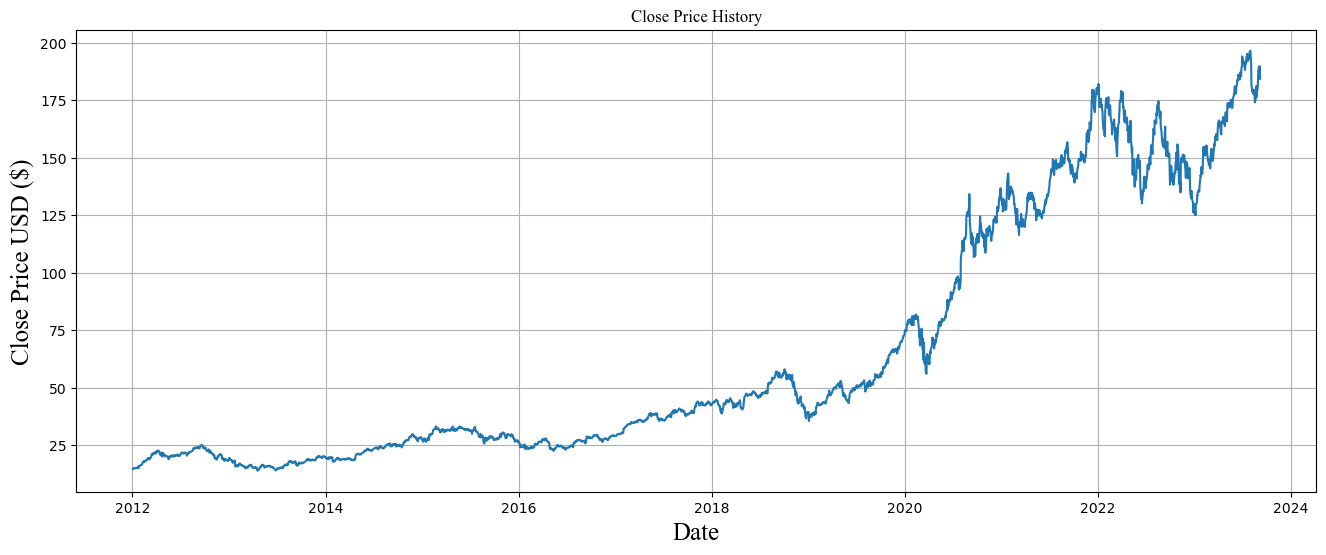

In [124]:
plt.figure(figsize=(16,6))
plt.title('Close Price History',**csfont)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18,**csfont)
plt.ylabel('Close Price USD ($)', fontsize=18,**csfont)
plt.show()

In [125]:
# Create a new dataframe with only the 'Close' column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2792

95% of our Data is used to train and test the network, the last 5% will be kept for validation. 

In [126]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.96169921],
       [0.9630142 ],
       [0.93320638]])

In [127]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets.
# Final 60 values will be used for testing, all values from start to 95% of the total - 60 are used for training.
# Final 5% are used for Validation.

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [128]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2732/2732 [==============================] - 42s 14ms/step - loss: 0.0010




We use Adam Optimizer as it is the best performing Optimizer for LSTM networks, look at the link given below where it is beautifully explained. 

https://deepdatascience.wordpress.com/2016/11/18/which-lstm-optimizer-to-use/

In [129]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 23ms/step


10.748171634183567

Testing is done using 60 values for each case.
I.e. , x_test[0] will contain values from training_data_len 0 to 60.

We always use Numpy arrays during Neural Networks as they are easier, faster to work with.

C:\Users\dhruv\AppData\Local\Temp\ipykernel_21868\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


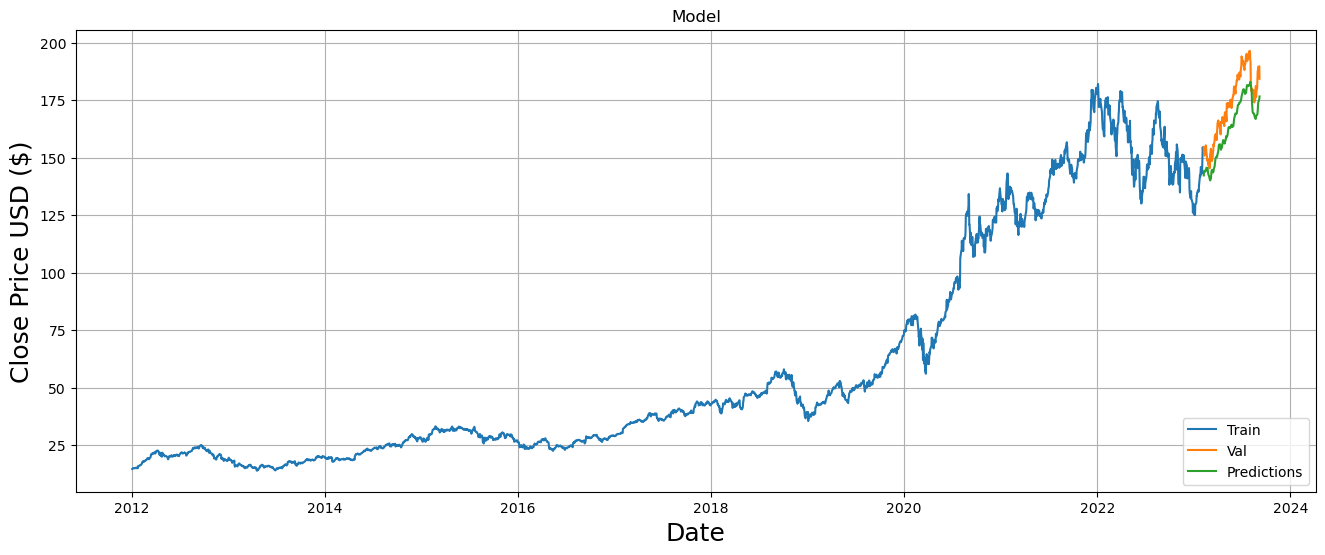

In [130]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [133]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-02-07,154.649994,142.275436
2023-02-08,151.919998,143.780792
2023-02-09,150.869995,144.360504
2023-02-10,151.009995,144.237885
2023-02-13,153.850006,143.894730
...,...,...
2023-08-30,187.649994,170.236893
2023-08-31,187.869995,172.147125
2023-09-01,189.460007,173.885422


In [134]:
model.layers

In [135]:
lstm_layer=model.layers[0] # visualising first layer weights 
weights=lstm_layer.get_weights()

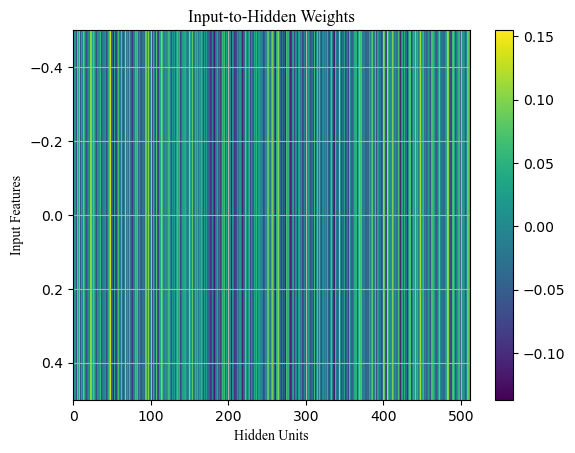

In [137]:
plt.imshow(weights[0], cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Input-to-Hidden Weights',**csfont)
plt.xlabel('Hidden Units',**csfont)
plt.ylabel('Input Features',**csfont)
plt.show()

Using the heatmap above we can quickly identify which neurons are most important and which input features are most relevant.


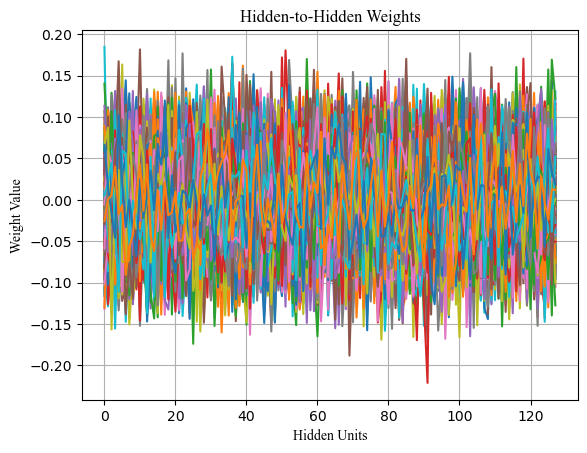

In [139]:
plt.plot(weights[1])
plt.title('Hidden-to-Hidden Weights',**csfont)
plt.xlabel('Hidden Units',**csfont)
plt.ylabel('Weight Value',**csfont)
plt.show()

Although this graph looks like quite a mess, it shows us how the weights change over time.


In [145]:
len(weights[1])

128

In [161]:
len(weights[1][:50])

50

In [164]:
len(weights[1].flatten()[:50])

50

------------------------------------------------------------------------------------
# Thank you!
------------------------------------------------------------------------------------